In [2]:
import matplotlib.pyplot as plt
import cv2 as cv 
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-11-08 14:07:24.277823: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 14:07:24.282619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 14:07:24.296957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731064044.323233   23529 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731064044.330223   23529 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 14:07:24.357452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

- Load Random Images

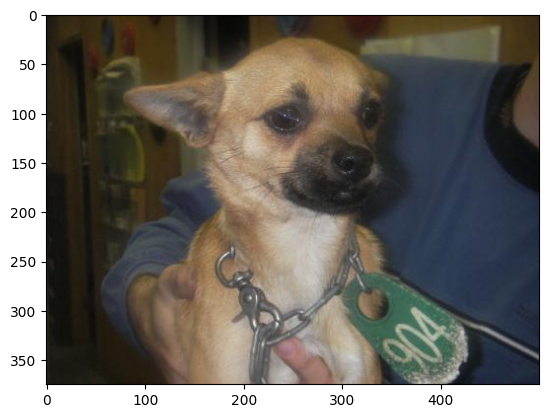

In [4]:
file_name = "../../data/CATS_DOGS/train/DOG/"+str(np.random.randint(0, 5000))+".jpg"

random_dog = cv.cvtColor(cv.imread(file_name),cv.COLOR_BGR2RGB)
plt.imshow(random_dog)

In [5]:
generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

The provided code snippet initializes an instance of the 

ImageDataGenerator is a class from the TensorFlow Keras API. This class is used for real-time data augmentation, which is a technique to artificially expand the size of a training dataset by creating modified versions of images. Data augmentation helps improve the generalization ability of a machine learning model by introducing variations in the training data. 
 
Here's a detailed explanation of each parameter used

### Parameters

1. **rotation_range=30**:
   - This parameter specifies the range (in degrees) within which to randomly rotate the images. In this case, images will be randomly rotated by up to 30 degrees clockwise or counterclockwise. Rotation helps the model become invariant to the orientation of objects in the images.

2. **width_shift_range=0.1**:
   - This parameter specifies the range (as a fraction of the total width) within which to randomly shift the images horizontally. A value of 0.1 means the images can be shifted left or right by up to 10% of their width. Horizontal shifts help the model become invariant to the horizontal position of objects.

3. **height_shift_range=0.1**:
   - This parameter specifies the range (as a fraction of the total height) within which to randomly shift the images vertically. A value of 0.1 means the images can be shifted up or down by up to 10% of their height. Vertical shifts help the model become invariant to the vertical position of objects.

4. **rescale=1/255**:
   - This parameter rescales the pixel values of the images by the specified factor. In this case, pixel values are divided by 255 to normalize them to the range [0, 1]. Normalization is important for ensuring that the model trains effectively, as it helps stabilize the learning process.

5. **shear_range=0.2**:
   - This parameter specifies the shear intensity (as a fraction) to apply to the images. Shearing involves slanting the shape of the objects in the images, which helps the model become invariant to such distortions. A value of 0.2 means the images can be sheared by up to 20%.

6. **zoom_range=0.2**:
   - This parameter specifies the range for randomly zooming in or out on the images. A value of 0.2 means the images can be zoomed in or out by up to 20%. Zooming helps the model become invariant to the scale of objects in the images.

7. **horizontal_flip=True**:
   - This parameter specifies whether to randomly flip the images horizontally. Setting it to `True` means that images will be randomly flipped along the vertical axis. Horizontal flipping helps the model become invariant to the left-right orientation of objects.

8. **fill_mode='nearest'**:
   - This parameter specifies the strategy to use for filling in new pixels that are created during transformations such as rotation or shifting. The `'nearest'` mode means that the new pixels will be filled with the nearest pixel values from the original image. This helps maintain the integrity of the image content during augmentation.

### Summary

In summary, the ImageDataGenerator instance image_data is configured to perform various data augmentation techniques, including rotation, shifting, rescaling, shearing, zooming, and horizontal flipping. These augmentations introduce variations in the training data, helping the model generalize better to new, unseen data. The `fill_mode='nearest'` ensures that new pixels created during transformations are filled appropriately. Data augmentation is a powerful technique to improve the robustness and performance of machine learning models, especially in image classification tasks.

- Test generator

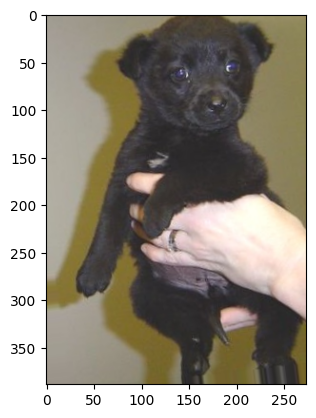

In [6]:
random_dog = cv.cvtColor(
    cv.imread("../../data/CATS_DOGS/train/DOG/200.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(generator.random_transform(random_dog))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense,Input

In [8]:
model = Sequential()

model.add(Input(shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2024-11-08 14:07:30.469356: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,479,425 (9.46 MB)

 Trainable params: 2,479,425 (9.46 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size = 16 

train_image_data = generator.flow_from_directory("../../data/CATS_DOGS/train",target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [11]:
batch_size = 16

test_image_data = generator.flow_from_directory("../../data/CATS_DOGS/test", target_size=(150,150),batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [12]:
results = model.fit(train_image_data, epochs=10, steps_per_epoch=200)

/home/dododoyo/Documents/ML/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-11-08 14:07:52.764588: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-11-08 14:07:52.833316: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.
2024-11-08 14:07:52.946944: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31961088 exceeds 10% of free system memory.
2024-11-08 14:07:53.099305: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42467328 exceeds 10% of free system memory.


  1/200 ━━━━━━━━━━━━━━━━━━━━ 8:01 2s/step - accuracy: 0.3125 - loss: 0.7159

2024-11-08 14:07:53.321893: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.


200/200 ━━━━━━━━━━━━━━━━━━━━ 186s 925ms/step - accuracy: 0.5106 - loss: 0.7069
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 159s 791ms/step - accuracy: 0.5595 - loss: 0.6839
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 626ms/step - accuracy: 0.5607 - loss: 0.6839
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 129s 646ms/step - accuracy: 0.5672 - loss: 0.6822
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 146s 730ms/step - accuracy: 0.5822 - loss: 0.6808
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 119s 595ms/step - accuracy: 0.5787 - loss: 0.6749
Epoch 7/10


2024-11-08 14:22:15.382169: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


200/200 ━━━━━━━━━━━━━━━━━━━━ 129s 646ms/step - accuracy: 0.5710 - loss: 0.6787
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 140s 700ms/step - accuracy: 0.5951 - loss: 0.6738
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 130s 650ms/step - accuracy: 0.5974 - loss: 0.6700
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 134s 670ms/step - accuracy: 0.6212 - loss: 0.6610
